## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
from pandas.plotting import table
%matplotlib notebook
%matplotlib inline

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
combined_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean =       combined_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median =     combined_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance =   combined_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev =       combined_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem =        combined_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

sumstat_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                           "Std. Deviation": stdev, "SEM": sem})
sumstat_df.round(2)

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

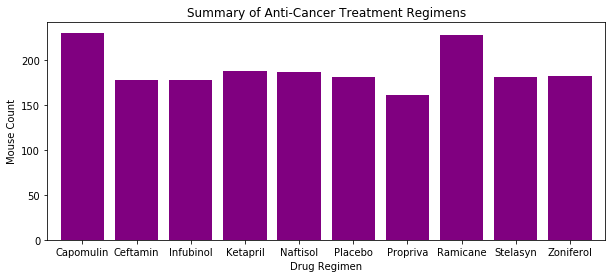

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
combined_df = pd.DataFrame(combined_dataset.groupby(["Drug Regimen"]).count()).reset_index()

pandas_bar = combined_df.plot.bar(x='Drug Regimen', y='Mouse ID', rot=0, color='purple', legend = False, figsize=(10,4), width = 0.8, title = "Summary of Anti-Cancer Treatment Regimens")
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Mouse Count")
pandas_bar

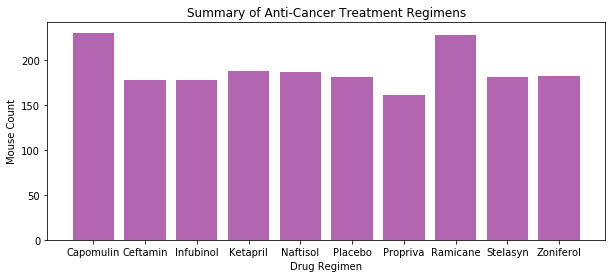

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimens = sumstat_df.index.tolist()
reg_count = (combined_dataset.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

x_axis = drug_regimens

plt.figure(figsize=(10,4))
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse Count')
plt.title("Summary of Anti-Cancer Treatment Regimens")
plt.bar(x_axis, reg_count, color='purple', alpha=0.6, align="center")
plt.show()

## Pie plots

Text(0, 0.5, '')

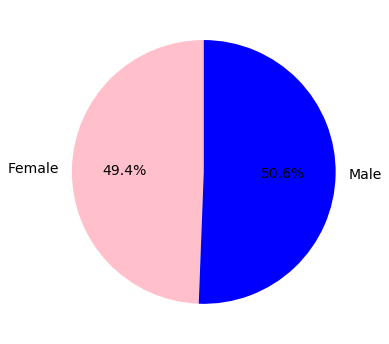

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combined_dataset.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})

plt.figure(figsize=(13,8))
pandas_pie = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=pandas_pie, autopct='%1.1f%%', colors = ['pink', 'blue'] ,
startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=14)
pandas_pie.set_ylabel('')

(-1.2046267933372004,
 1.113863803334309,
 -1.173255548824426,
 1.1126838464901807)

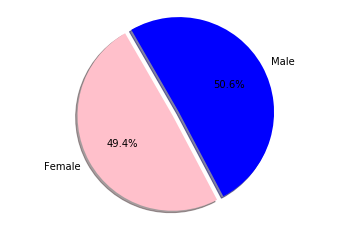

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (combined_dataset.groupby(["Sex"])["Age_months"].count()).tolist()

labels = ["Female", "Male"]

colors = ["pink", "blue"]

explode = (0.075, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")

## Quartiles, outliers and boxplots

Capomulin

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

sorted_df = combined_dataset.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()

capomulin_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
capomulin_data_df.head().reset_index()

# Convert Tumor Volume column into df object
capomulin_list = capomulin_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capomulin_list = capomulin_list["Tumor Volume (mm3)"]

# Quartile calc's

quartiles = capomulin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


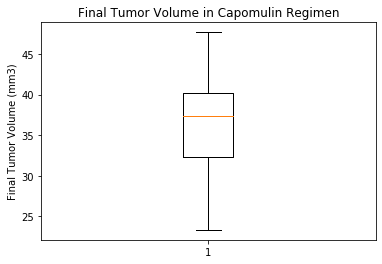

In [9]:
# Box+Whisker Plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capomulin_list)
plt.show()

Ceftamin

In [10]:
# Select data for Ceftamin, reset index
cef_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df.head().reset_index()

# Convert Tumor Volume column into df object
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]

# Quartile calc's
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


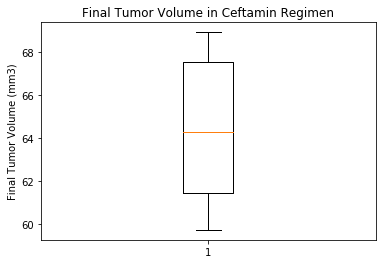

In [11]:
# Box+Whisker Plot for Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

Ramicane

In [12]:
# Select data for Ramicane, reset index
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()

# Convert Tumor Volume column into df object
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]

# Quartile calc's
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


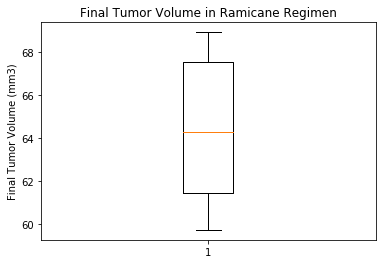

In [13]:
# Box+Whisker Plot for Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

Zoniferol

In [14]:
# Select data for Zoniferol, reset index
zon_data_df = max_df[max_df['Drug Regimen'].isin(['Zoniferol'])]
zon_data_df.head().reset_index()

# Convert Tumor Volume column into df object
zon_list = zon_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
zon_list = zon_list["Tumor Volume (mm3)"]

# Quartile calc's
quartiles = zon_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.61814874
The upper quartile of temperatures is: 68.34176324
The interquartile range of temperatures is: 5.723614500000004
The the median of temperatures is: 65.68468877999999 
Values below 54.03272699 could be outliers.
Values above 76.92718499000001 could be outliers.


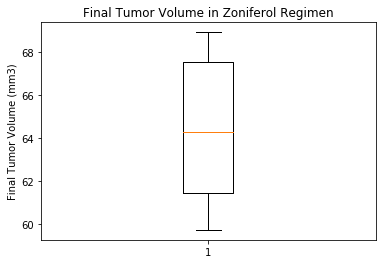

In [15]:
# Box+Whisker Plot for Zoniferol
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Zoniferol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

## Line and scatter plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_ls_df = combined_dataset.loc[combined_dataset["Drug Regimen"] == "Capomulin"]
capomulin_ls_df = capomulin_ls_df.reset_index()

cap_mouse_df = capomulin_ls_df.loc[capomulin_ls_df["Mouse ID"] == "r157"]

cap_mouse_df = cap_mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_mouse_df = cap_mouse_df.reset_index(drop=True)
cap_mouse_df

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,45.597064
2,10,46.059608
3,15,46.539206


Text(0, 0.5, 'Tumor Volume')

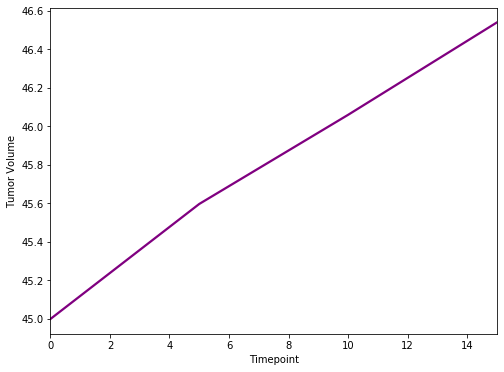

In [17]:
cap_mouse_df.set_index('Timepoint').plot(figsize=(8, 6), linewidth=2.25, legend=None, color='purple')

plt.ylabel('Tumor Volume')

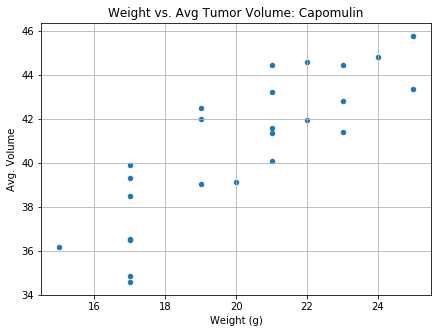

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_slim_df = capomulin_ls_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

mean_cap = pd.DataFrame(cap_slim_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

mean_cap = mean_cap.rename(columns={"Tumor Volume (mm3)": "Avg. Volume"})

mean_cap = mean_cap.set_index('Mouse ID')

mean_cap.plot(kind="scatter", x="Weight (g)", y="Avg. Volume", grid=True, figsize=(7,5),
              title="Weight vs. Avg Tumor Volume: Capomulin")
plt.show()

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = mean_cap.iloc[:,0]
mean_tumor_volume = mean_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,mean_tumor_volume)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


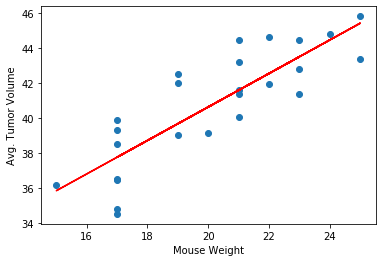

In [20]:
# Add regression line to scatter plot
x_values = mean_cap['Weight (g)']
y_values = mean_cap['Avg. Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Mouse Weight')
plt.ylabel('Avg. Tumor Volume')
plt.show()